In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]#2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#convert into 1D array
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)


In [6]:
classes=['airplane','automobile','bird','cat','frog','beer','dog','horse','ship','truck']

In [7]:
#define function
def plot_sample(X,y,index):
    plt.Figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


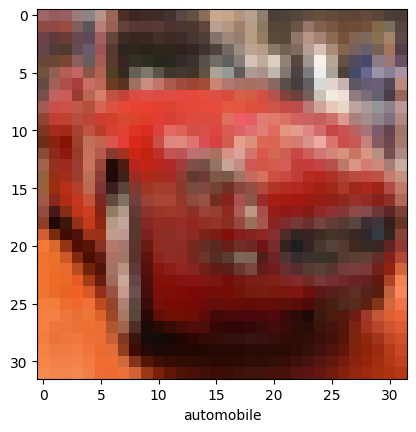

In [8]:
plot_sample(X_train,y_train,5)

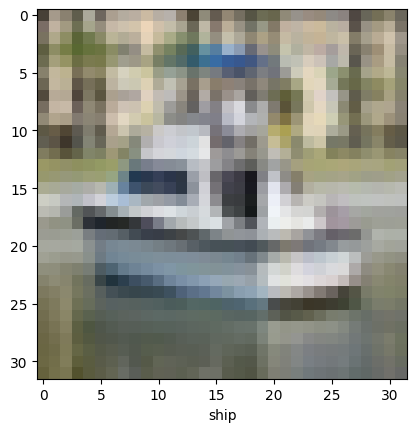

In [9]:
plot_sample(X_train,y_train,501)

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

**Pixel values range from 0 to 255**

In most images, each pixel is represented by an integer between 0 and 255 (for 8-bit images).

Example: Black = 0, White = 255 (in grayscale), and [R, G, B] values also fall in this range.

In [11]:
ANN=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])


d:\Importants\RAG\Module 1\DS task\task\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.3534 - loss: 1.8107
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4253 - loss: 1.6232
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4574 - loss: 1.5407
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4772 - loss: 1.4818
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4950 - loss: 1.4332


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ANN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification report: \n',classification_report(y_test,y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      1000
           1       0.40      0.81      0.54      1000
           2       0.46      0.22      0.30      1000
           3       0.39      0.17      0.24      1000
           4       0.41      0.48      0.44      1000
           5       0.36      0.47      0.40      1000
           6       0.59      0.41      0.48      1000
           7       0.61      0.48      0.54      1000
           8       0.50      0.72      0.59      1000
           9       0.56      0.35      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



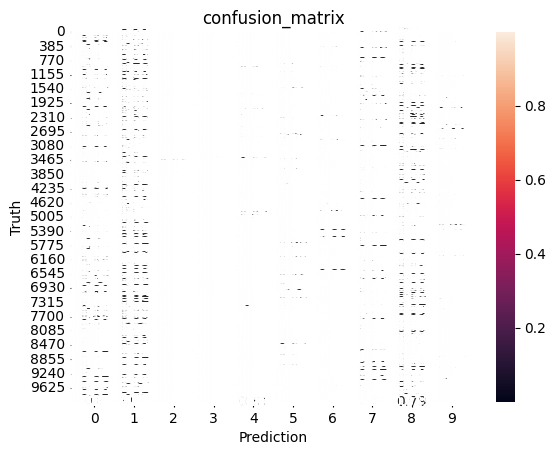

In [14]:
plt.Figure(figsize=(14,7))
sn.heatmap(y_pred,annot=True)
plt.xlabel("Prediction")
plt.ylabel('Truth')
plt.title('confusion_matrix')
plt.show()

In [15]:
CNN=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

d:\Importants\RAG\Module 1\DS task\task\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [17]:
CNN.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.4680 - loss: 1.4777
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6108 - loss: 1.1164
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6537 - loss: 0.9934
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6806 - loss: 0.9146
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7029 - loss: 0.8546
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7247 - loss: 0.7949
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7412 - loss: 0.7462
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7545 - loss: 0.7077
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7664 - loss: 0.6694
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7799 - loss: 0.6331
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.7905 - loss: 0.5984
Epoch 12

In [18]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6968 - loss: 1.2069


[1.2068935632705688, 0.6967999935150146]

In [19]:
y_pred=CNN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [20]:
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification report: \n',classification_report(y_test,y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.88      0.73      0.80      1000
           2       0.56      0.61      0.58      1000
           3       0.53      0.42      0.47      1000
           4       0.65      0.70      0.67      1000
           5       0.55      0.67      0.60      1000
           6       0.80      0.77      0.79      1000
           7       0.77      0.73      0.75      1000
           8       0.75      0.86      0.80      1000
           9       0.78      0.75      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



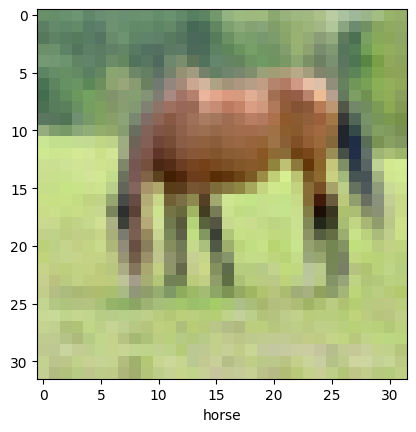

In [21]:
plot_sample(X_test,y_test,60)

In [ ]:
import pickle

with open("CNN.pkl", "wb") as f:   
    pickle.dump(CNN, f)

